Epoch 1/100
25/25 - 0s - loss: 436.7123 - 134ms/epoch - 5ms/step
Epoch 2/100
25/25 - 0s - loss: 12.0552 - 16ms/epoch - 627us/step
Epoch 3/100
25/25 - 0s - loss: 4.2697 - 16ms/epoch - 636us/step
Epoch 4/100
25/25 - 0s - loss: 1.8252 - 17ms/epoch - 668us/step
Epoch 5/100
25/25 - 0s - loss: 0.9939 - 18ms/epoch - 730us/step
Epoch 6/100
25/25 - 0s - loss: 0.6628 - 21ms/epoch - 838us/step
Epoch 7/100
25/25 - 0s - loss: 0.5075 - 21ms/epoch - 853us/step
Epoch 8/100
25/25 - 0s - loss: 0.4239 - 21ms/epoch - 822us/step
Epoch 9/100
25/25 - 0s - loss: 0.3621 - 20ms/epoch - 805us/step
Epoch 10/100
25/25 - 0s - loss: 0.3255 - 19ms/epoch - 772us/step
Epoch 11/100
25/25 - 0s - loss: 0.2977 - 19ms/epoch - 758us/step
Epoch 12/100
25/25 - 0s - loss: 0.2769 - 18ms/epoch - 720us/step
Epoch 13/100
25/25 - 0s - loss: 0.2586 - 19ms/epoch - 750us/step
Epoch 14/100
25/25 - 0s - loss: 0.2381 - 18ms/epoch - 729us/step
Epoch 15/100
25/25 - 0s - loss: 0.2245 - 19ms/epoch - 744us/step
Epoch 16/100
25/25 - 0s - loss: 

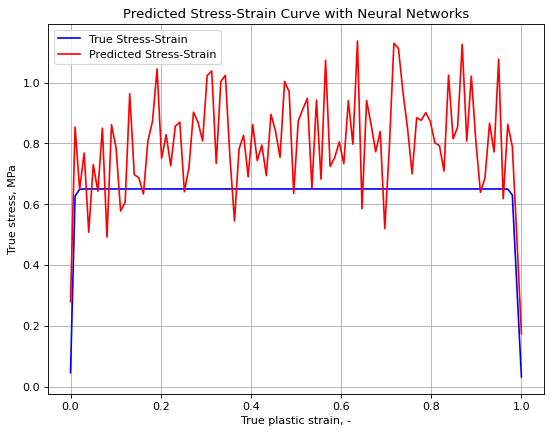

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split


def swift_voce(c1, c2, c3, c4, c5, c6, c7, true_plastic_strain):
    true_stress = c1 * (1 - np.exp(-c2 * true_plastic_strain)) + c3 + c4 * true_plastic_strain ** c5
    true_stress /= 1 + c6 * true_plastic_strain ** c7
    return true_stress

# Generate synthetic data
def generate_synthetic_data(num_samples):
    data = []
    for _ in range(num_samples):
        c1 = np.random.uniform(0.5, 1.0)
        c2 = np.random.uniform(100.0, 400.0)
        c3 = np.random.uniform(0.04, 0.08)
        c4 = np.random.uniform(0.3, 0.6)
        c5 = np.random.uniform(800, 1600)
        c6 = np.random.uniform(20.0, 40.0)
        c7 = np.random.uniform(300.0, 500.0)
        
        params = (c1, c2, c3, c4, c5, c6, c7)
        
        true_plastic_strain = np.linspace(0, 1, 100)
        true_stress = swift_voce(c1, c2, c3, c4, c5, c6, c7, true_plastic_strain)
        
        data.append((params, true_stress, true_plastic_strain))
    
    return data

# Generate and preprocess synthetic data
num_samples = 1000
synthetic_data = generate_synthetic_data(num_samples)
params, true_stress, true_plastic_strain = zip(*synthetic_data)

# Split the data into training and testing sets
params_train, params_test, stress_train, stress_test, strain_train, strain_test = train_test_split(params, true_stress, true_plastic_strain, test_size=0.2, random_state=42)

# Create a neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(7,)),  # 7 parameters
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(100, activation='linear')  # 100 values in the predicted stress-strain curve
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(np.array(params_train), np.array(stress_train), epochs=100, verbose=2)

# Evaluate the model on the testing data
loss = model.evaluate(np.array(params_test), np.array(stress_test))
print(f"Test Loss: {loss:.4f}")

# Make predictions
predicted_stress = model.predict(np.array(params_test))

# Plot a predicted stress-strain curve
plt.figure(figsize=(8, 6), dpi=80)
plt.title("Predicted Stress-Strain Curve with Neural Networks")
plt.xlabel("True plastic strain, -")
plt.ylabel("True stress, MPa")

plt.plot(strain_test[0], stress_test[0], label="True Stress-Strain", color="blue")
plt.plot(strain_test[0], predicted_stress[0], label="Predicted Stress-Strain", color="red")

plt.legend()
plt.grid(True)
plt.show()
